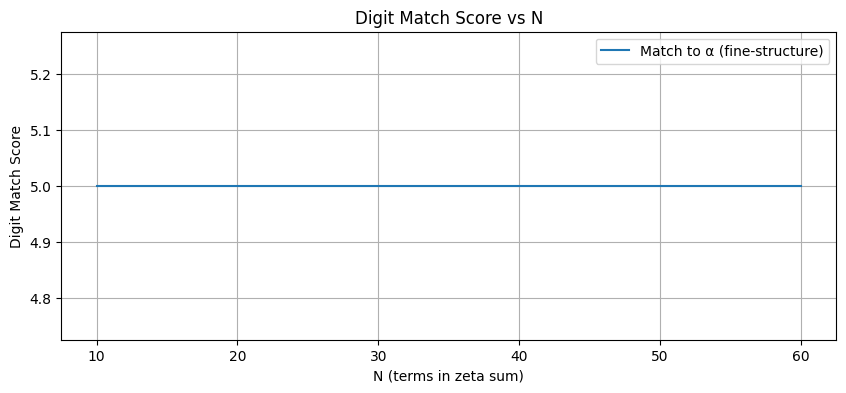

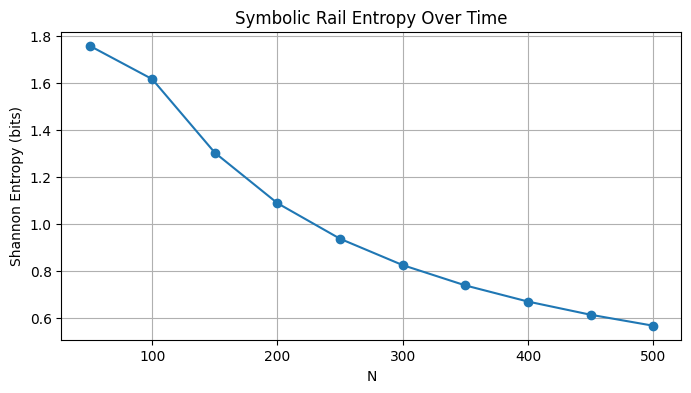

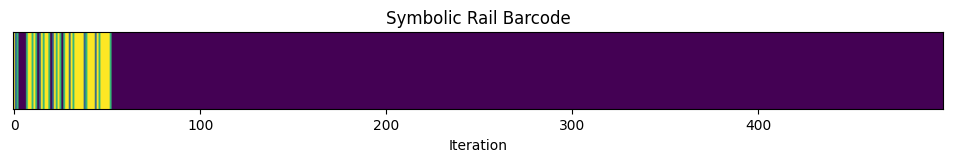

,Constant,Value,MatchScore (Zeta)
24,alpha,0.007297,5
23,fine_structure,0.007297,5
22,1/sqrt(sqrt(3)),0.759836,4
3,pi/3,1.047198,4
18,1/sqrt(sqrt(2)),0.840896,4
0,pi,3.141593,3
1,sqrt(pi),1.772454,3
4,pi/4,0.785398,3
5,pi-3,0.141593,3
31,1/fib_word_decimal,3.445940,3


In [1]:
# 📦 Colab-Compatible: Self-Contained Golden Recursive Attractor Suite (Extended Diagnostic Version)

# --- 🔧 Imports and Environment Setup ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sympy import primerange
from IPython.display import display

# --- 📐 Constants and Targets ---
phi_f = (1 + math.sqrt(5)) / 2
alpha_inv = 137.035999
alpha = 1 / alpha_inv
delta = math.pi - 3.141412303134
fine_structure_decimal = 0.0072973525693

# Feigenbaum constants, Euler-Mascheroni, Apery's Constant
feigenbaum_delta = 4.669201609
feigenbaum_alpha = 2.502907875
euler_gamma = 0.5772156649
zeta_3 = 1.2020569031

# Fibonacci word decimal
def fibonacci_word(n):
    a, b = "0", "01"
    for _ in range(n):
        a, b = b, b + a
    return b[:2**n]

fib_word_str = fibonacci_word(10)
fib_word_decimal = sum([int(b)*(0.5**(i+1)) for i,b in enumerate(fib_word_str)])
fib_word_decimal = fib_word_decimal if fib_word_decimal != 0 else 1e-10

# Constant dictionary with variations
constants_to_test = {
    "pi": math.pi,
    "sqrt(pi)": math.sqrt(math.pi),
    "pi/2": math.pi / 2,
    "pi/3": math.pi / 3,
    "pi/4": math.pi / 4,
    "pi-3": math.pi - 3,
    "pi/sqrt(3)": math.pi / math.sqrt(3),
    "phi": phi_f,
    "phi-1": phi_f - 1,
    "phi^2": phi_f**2,
    "sqrt(phi-1)": math.sqrt(phi_f - 1),
    "sqrt(phi)": math.sqrt(phi_f),
    "1-(phi-1)": 1 - (phi_f - 1),
    "1/phi": 1 / phi_f,
    "1/(phi-1)": 1 / (phi_f - 1),
    "sqrt(2)": math.sqrt(2),
    "sqrt(sqrt(2))": math.sqrt(math.sqrt(2)),
    "1/sqrt(2)": 1 / math.sqrt(2),
    "1/sqrt(sqrt(2))": 1 / math.sqrt(math.sqrt(2)),
    "sqrt(3)": math.sqrt(3),
    "sqrt(sqrt(3))": math.sqrt(math.sqrt(3)),
    "1/sqrt(3)": 1 / math.sqrt(3),
    "1/sqrt(sqrt(3))": 1 / math.sqrt(math.sqrt(3)),
    "fine_structure": fine_structure_decimal,
    "alpha": alpha,
    "alpha_inv": alpha_inv,
    "feigenbaum_delta": feigenbaum_delta,
    "feigenbaum_alpha": feigenbaum_alpha,
    "euler_gamma": euler_gamma,
    "zeta_3": zeta_3,
    "fib_word_decimal": fib_word_decimal,
    "1/fib_word_decimal": 1 / fib_word_decimal,
    "1 - fib_word_decimal": 1 - fib_word_decimal
}

# --- 🔢 Utilities ---
def digit_match_score(a, b, window=6):
    a_str = f"{a:.16f}".replace('.', '')
    b_str = f"{b:.16f}".replace('.', '')
    max_score = 0
    for i in range(len(a_str)-window):
        a_sub = a_str[i:i+window]
        for j in range(len(b_str)-window):
            b_sub = b_str[j:j+window]
            score = sum(x==y for x, y in zip(a_sub, b_sub))
            max_score = max(max_score, score)
    return max_score

# --- 🔬 Zeta Generator ---
def golden_damped_zeta_safe(N=50, log_term_cutoff=-700, variant='phi^n'):
    primes = list(primerange(1, 1000))[:N]
    log_phi = math.log(phi_f)
    terms = []

    for i, p in enumerate(primes):
        try:
            n = i + 1
            log_p = math.log(p)

            if variant == 'phi^n':
                exp_term = math.exp(n * log_phi)
            elif variant == 'n^phi':
                exp_term = math.exp(phi_f * math.log(n))
            elif variant == 'n*log(phi)':
                exp_term = n * log_phi
            else:
                raise ValueError("Invalid variant")

            log_term = -exp_term * log_p
            terms.append(math.exp(log_term) if log_term > log_term_cutoff else 0)

        except Exception:
            terms.append(0)

    zeta_val = sum(terms)
    return zeta_val, zeta_val * alpha_inv

# --- 📈 Match Curve Over N ---
def match_curve_plot(constant, label="Target"):
    N_values = range(10, 61)
    scores = [digit_match_score(golden_damped_zeta_safe(N, variant='phi^n')[1], constant) for N in N_values]
    plt.figure(figsize=(10, 4))
    plt.plot(N_values, scores, label=f"Match to {label}")
    plt.title("Digit Match Score vs N")
    plt.xlabel("N (terms in zeta sum)")
    plt.ylabel("Digit Match Score")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- 📊 Entropy Over Time ---
def entropy_over_time(max_N=500, step=50):
    rail_thresholds = [phi_f**-3, phi_f**-2, phi_f**-1]
    x = 0.314159
    entropy_series = []
    for N in range(step, max_N+1, step):
        rails = []
        x_local = x
        for _ in range(N):
            x_local = (2 * x_local) % 1
            if x_local < rail_thresholds[0]: rails.append(0)
            elif x_local < rail_thresholds[1]: rails.append(1)
            elif x_local < rail_thresholds[2]: rails.append(2)
            else: rails.append(3)
        counts = [rails.count(i) for i in range(4)]
        probs = [c/N for c in counts if c > 0]
        entropy = -sum(p * math.log2(p) for p in probs)
        entropy_series.append((N, entropy))
    df_entropy = pd.DataFrame(entropy_series, columns=["N", "Entropy"])
    return df_entropy

# --- 🧬 Barcode Rail Visual ---
def barcode_rails(N=500):
    rail_thresholds = [phi_f**-3, phi_f**-2, phi_f**-1]
    x = 0.314159
    rails = []
    for _ in range(N):
        x = (2 * x) % 1
        if x < rail_thresholds[0]: rails.append(0)
        elif x < rail_thresholds[1]: rails.append(1)
        elif x < rail_thresholds[2]: rails.append(2)
        else: rails.append(3)
    plt.figure(figsize=(12, 1))
    plt.imshow([rails], cmap='viridis', aspect='auto')
    plt.title("Symbolic Rail Barcode")
    plt.yticks([])
    plt.xlabel("Iteration")
    plt.show()
    return rails

# --- 🔁 Run Tests and Visualizations ---
# 1. Plot match curve
match_curve_plot(alpha, label="α (fine-structure)")

# 2. Show entropy evolution
entropy_df = entropy_over_time()
plt.figure(figsize=(8, 4))
plt.plot(entropy_df["N"], entropy_df["Entropy"], marker='o')
plt.title("Symbolic Rail Entropy Over Time")
plt.xlabel("N")
plt.ylabel("Shannon Entropy (bits)")
plt.grid(True)
plt.show()

# 3. Barcode rail transitions
rails = barcode_rails()

# 4. Final match score table
zeta_match_results = []
for name, const in constants_to_test.items():
    try:
        _, scaled = golden_damped_zeta_safe(50, variant='phi^n')
        score = digit_match_score(scaled, const)
        zeta_match_results.append((name, const, score))
    except Exception:
        zeta_match_results.append((name, const, 0))

df_zeta_matches = pd.DataFrame(zeta_match_results, columns=["Constant", "Value", "MatchScore (Zeta)"])
display(df_zeta_matches.sort_values("MatchScore (Zeta)", ascending=False))
